In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, random
import PIL
import tensorflow as tf

from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# set root path
root_path = os.path.abspath('../..')
print("Bachelorarbeit-root:", root_path)

test_data_path = f'{root_path}/masks_dataset/test'
model_save_path = f'{root_path}/src/jupyter/best_model.h5'

Bachelorarbeit-root: /Users/carinastiedl/Documents/Hochschule/Bachelorarbeit


In [3]:
# parameters
image_size = (180, 180)

In [4]:
# load model
model = keras.models.load_model(model_save_path)

2022-08-11 16:58:18.952540: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
test_ds: tf.data.Dataset = keras.preprocessing.image_dataset_from_directory(
    test_data_path,
    image_size=image_size,
    batch_size=None,
)

Found 100 files belonging to 2 classes.


In [6]:
class_names = test_ds.class_names
print(class_names)

['mask', 'no_mask']


In [7]:
expected = []
predicted = []
scores = []
for image, label in test_ds:
    img_array = tf.expand_dims(image.numpy(), 0)  # Create batch axis
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0]) # [mask, no_mask]
    predicted_index = np.argmax(score) # get index of highest probability
    
    #print("Label:", class_names[int(label)])
    #print("Score:", class_names[np.argmax(score)])
    #print(score[1].numpy())
    expected.append(int(label)) 
    predicted.append(predicted_index)
    scores.append(score[1].numpy())
    

In [8]:
# Accuracy
import sklearn
sklearn.metrics.accuracy_score(expected, predicted)

0.87

In [9]:
tn, fp, fn, tp = confusion_matrix(expected, predicted).ravel()
print(f"tn: {tn}, fp: {fp}, fn: {fn}, tp: {tp}")


tn: 43, fp: 7, fn: 6, tp: 44


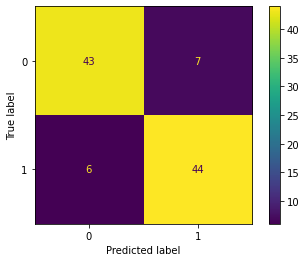

In [15]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(expected, predicted)
plt.savefig('ConfusionMatrix.png')
plt.show()

In [11]:
from sklearn.metrics import classification_report

print(classification_report(expected, predicted))


              precision    recall  f1-score   support

           0       0.88      0.86      0.87        50
           1       0.86      0.88      0.87        50

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



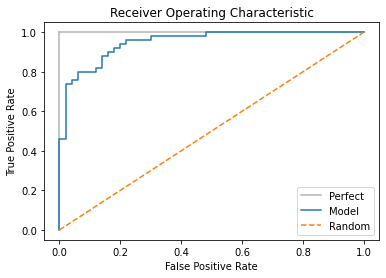

In [12]:
# ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(expected, scores)
#true_positive_rate = tp/(tp+fn)
#false_positive_rate = fp/(fp+tn)

plt.plot()

plt.title('Receiver Operating Characteristic')
plt.plot([0, 0], [1, 0] , c=".7", label="Perfect"), plt.plot([1, 1] , c=".7", label='_nolegend_')
plt.plot(false_positive_rate, true_positive_rate, label="Model")
plt.plot([0, 1], ls="--", label="Random")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.savefig('ROC_curve.jpg')
plt.show()

In [13]:
# Area Under Curve
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
auc = metrics.roc_auc_score(expected, scores)
print('AUC=%.5f' % (auc))

AUC=0.94960
